## Importing libraries and having a look at all data at present

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#all data given by ryo will be r_df

#reading dataset 1
r_df=pd.read_csv("/content/FoodAccessResearchAtlas2019csv.csv")

#converting all columns to lowercase
r_df.columns = map(str.lower, r_df.columns)

#dropping all states except new york
r_df = r_df.drop(r_df[r_df['state'] != 'New York'].index)

# resetting the DataFrame index
r_df = r_df.reset_index()

#displaying df
r_df

FileNotFoundError: [Errno 2] No such file or directory: '/content/FoodAccessResearchAtlas2019csv.csv'

In [ ]:
#selecting only Bronx
bronx_df = r_df[r_df['county'] == 'Bronx County']

#resetting index
bronx_df=bronx_df.reset_index()

bronx_df

In [ ]:
bronx_df=bronx_df.drop(['index', 'level_0'], axis=1)

bronx_df

In [ ]:
bronx_df.describe()

In [ ]:
bronx_df.info()
#bronx_df.select_dtypes(include=[np.float64, int])

NameError: name 'bronx_df' is not defined

In [ ]:
selected_cols=['state','county','tractlowi', 'tractkids', 'tractseniors', 'tractwhite', 'tractblack', 'tractasian', 'tracthispanic', 'tracthunv', 'tractsnap', 'povertyrate', 'medianfamilyincome']

key_indicators1=bronx_df[selected_cols]

key_indicators1

NameError: name 'bronx_df' is not defined

In [ ]:
key_indicators1.hist(bins=30, figsize=(15, 15))

NameError: name 'key_indicators1' is not defined

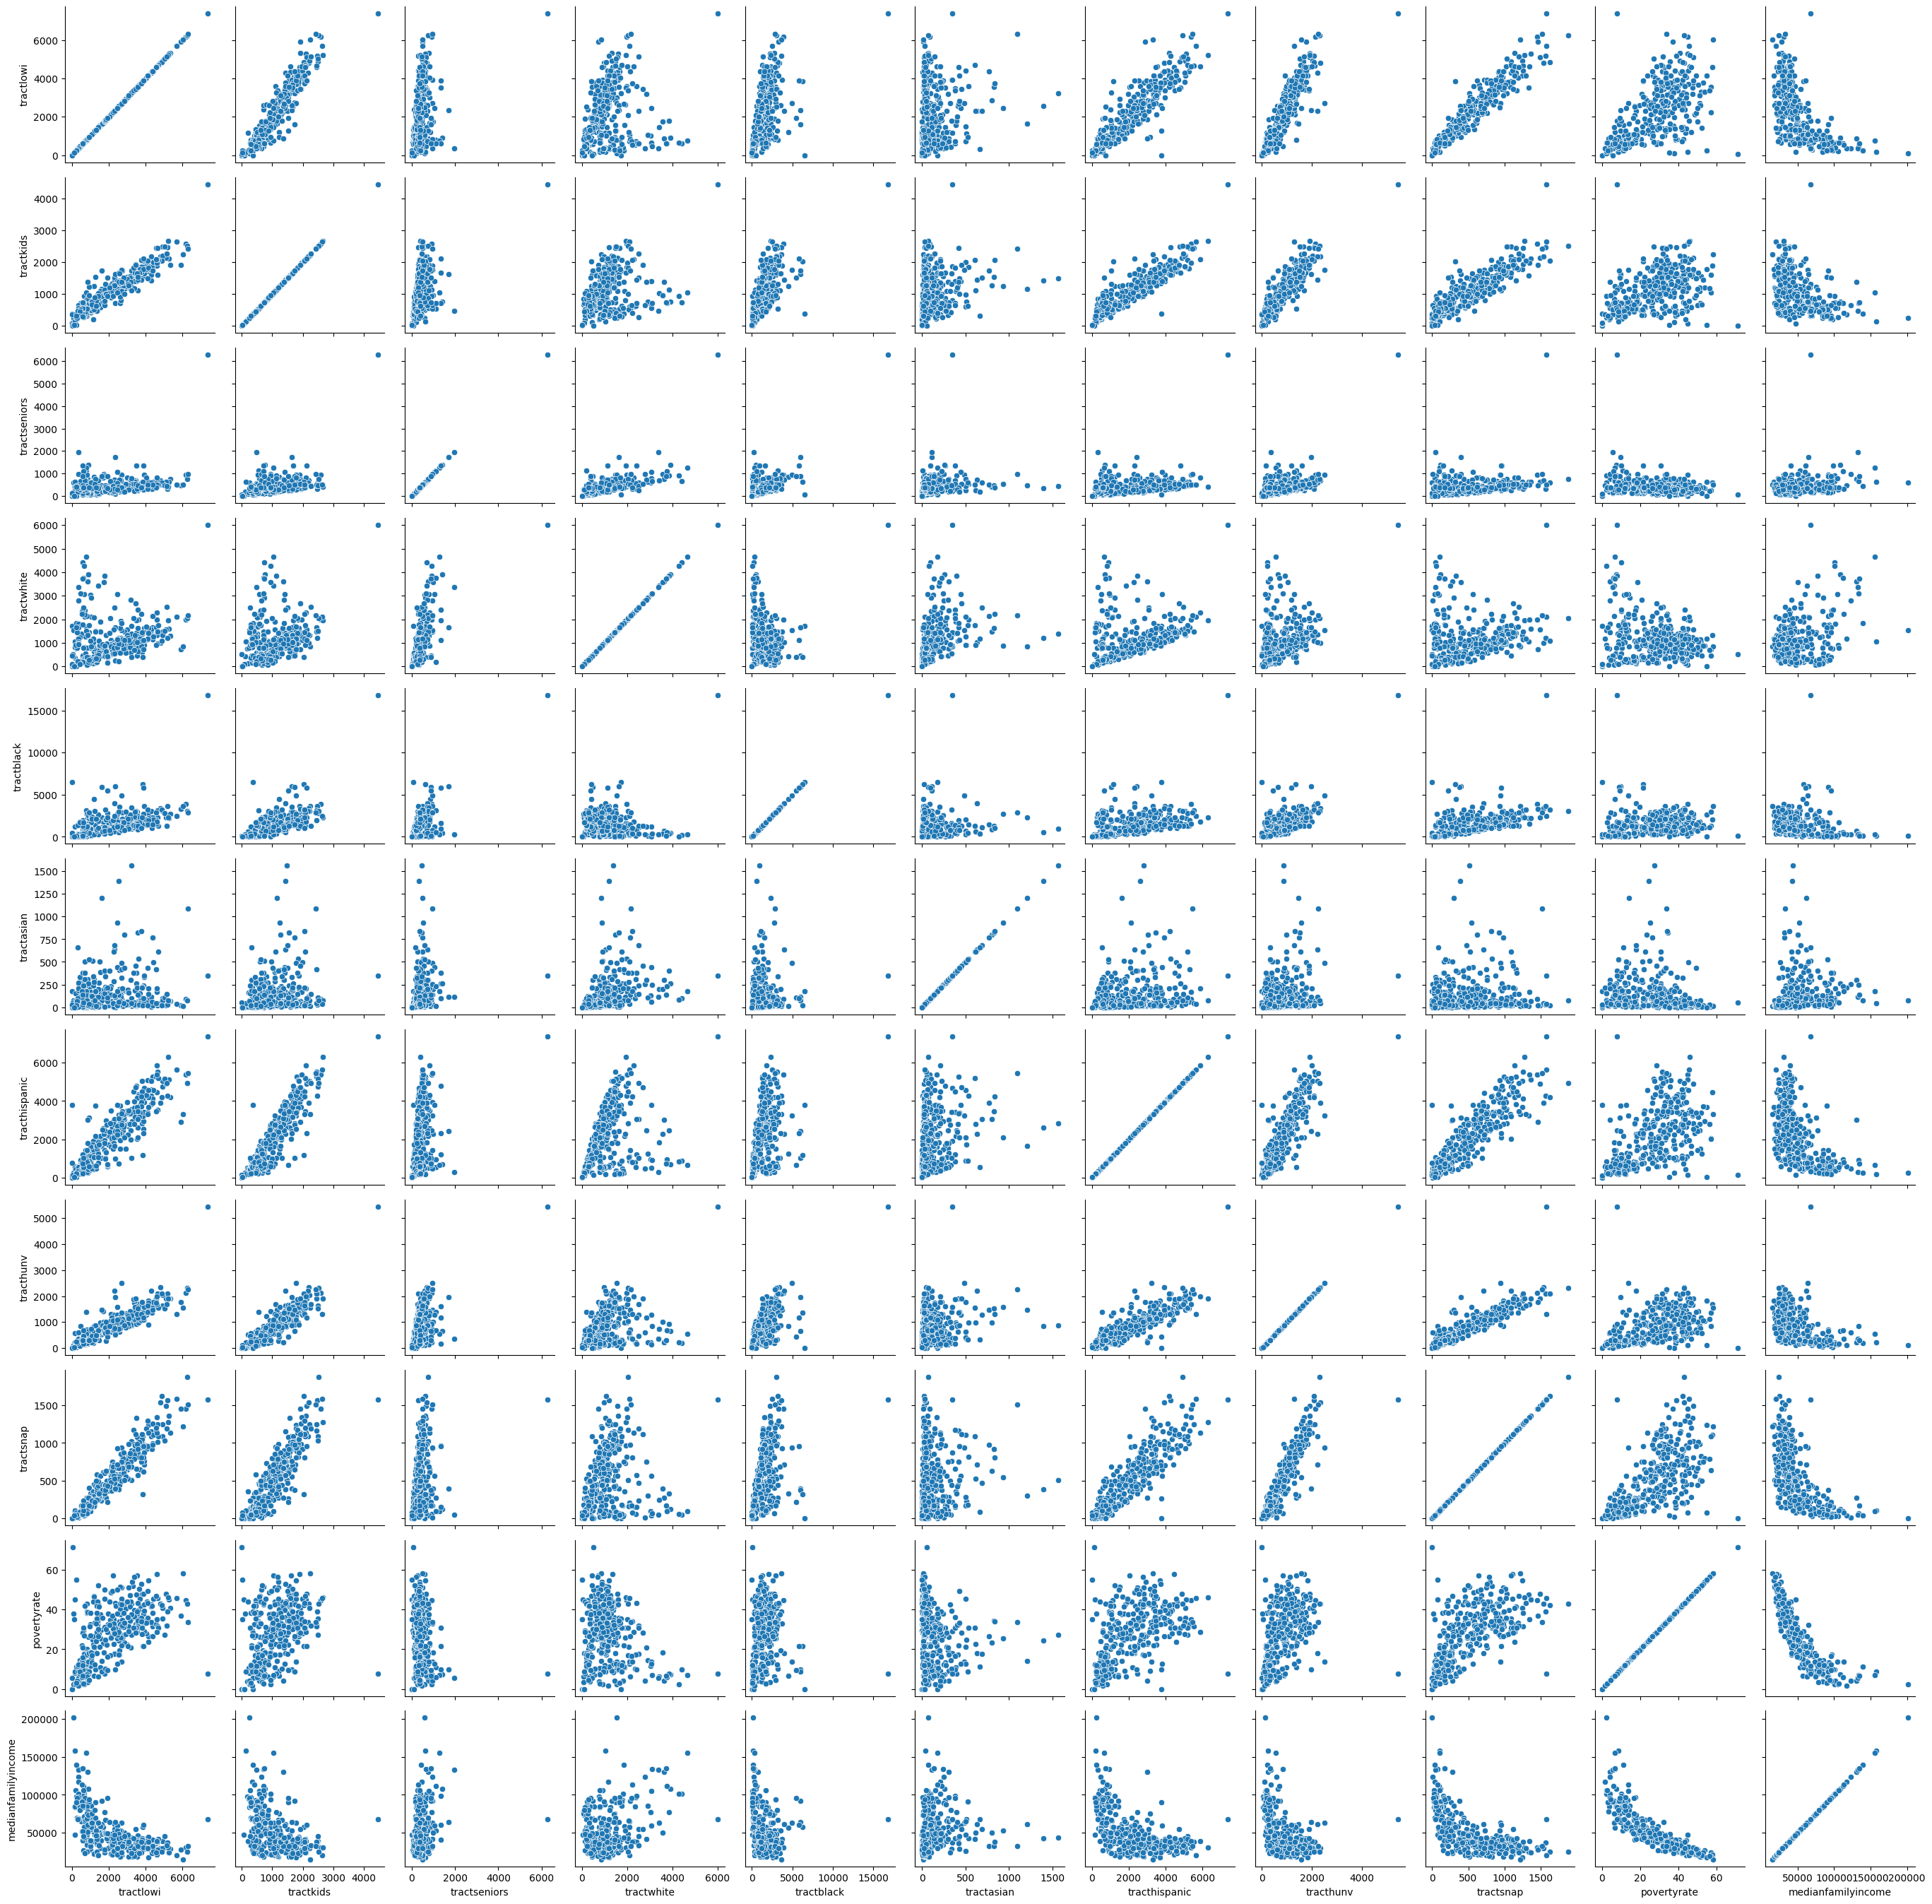

In [ ]:
g = sns.PairGrid(key_indicators1)
g.map(sns.scatterplot)

In [ ]:
bronx_df.isna().any()[lambda x: x].sum()

NameError: name 'bronx_df' is not defined

##Demographics--Key indicators to consider:

TractLOWI: Total count of low-income population in the tract. This can help assess the socio-economic status of different areas and its impact on food access, which may vary between genders.

TractKids: Total count of children age 0-17 in the tract. Gender-specific impacts on children's nutrition and health outcomes can be important to consider, especially for mothers who may be primary caregivers.

TractSeniors: Total count of seniors age 65+ in the tract. Gender differences in health outcomes among seniors, particularly related to nutrition and access to healthy food, can be relevant.

TractWhite, TractBlack, TractAsian, TractHispanic: Total count of population by racial/ethnic group in the tract. Considering intersectionality, the impact of food access disparities may differ between genders across different racial and ethnic groups.

TractHUNV: Total count of housing units without a vehicle in the tract. Gender differences in transportation access can affect food access and nutritional outcomes, particularly for women who may have caregiving responsibilities.

TractSNAP: Total count of housing units receiving SNAP benefits in the tract. Gender differences in reliance on food assistance programs like SNAP can provide insights into disparities in food access and nutritional outcomes.

PovertyRate: Share of the tract population living with income at or below the Federal poverty thresholds for family size. Gender disparities in poverty rates can influence food access and health outcomes.

MedianFamilyIncome: Tract median family income. Gender differences in income levels can impact purchasing power and access to healthy food options.

Health-related variables: Columns related to health conditions and outcomes, such as obesity rates, chronic diseases prevalence, and access to healthcare facilities, can provide insights into gender-specific health impacts of food access disparities.

##How to address

**Spatial Dynamics:**

Mapping Food Deserts: Create choropleth maps of NYC's boroughs showing the distribution of food deserts based on indicators like TractLOWI (low-income population), TractHUNV (housing units without a vehicle), PovertyRate, and MedianFamilyIncome. This will help visualize spatial variations in food access across different areas.

Temporal Analysis: Explore how the spatial distribution of food deserts changes over time during crises by analyzing changes in key indicators across different time periods, such as before, during, and after a crisis event.

Clustering Analysis: Use clustering algorithms like K-means to identify spatial clusters of food deserts within NYC's boroughs, considering socio-economic and demographic factors. This can help identify areas with similar characteristics and prioritize interventions accordingly.

**Gender-Specific Impacts:**

Gender Disaggregation: Analyze key indicators such as TractKids (count of children), TractSeniors (count of seniors), and TractSNAP (count of housing units receiving SNAP benefits) by gender to understand differential impacts on men and women.

Regression Analysis: Conduct regression analysis to assess the relationship between gender and access to healthy foods, controlling for other factors such as income, race/ethnicity, and household composition. This can help quantify the extent of gender disparities in food access.

Qualitative Analysis: Supplement quantitative analysis with qualitative insights from surveys or interviews to understand the unique challenges faced by men and women in accessing healthy foods during crises, considering factors like caregiving responsibilities and cultural norms.

**Intervention Strategies:**

Targeted Intervention Identification: Identify areas with the highest concentration of food deserts and the most significant gender disparities in food access. Propose targeted interventions such as mobile food markets, community gardens, or subsidies for healthy food purchases in these areas.

Policy Analysis: Evaluate existing policies related to food assistance programs like SNAP and assess their effectiveness in addressing gender-specific nutritional disparities. Identify gaps in coverage or accessibility and propose policy recommendations to bridge these gaps.

Community Engagement: Engage with community stakeholders, including residents, local businesses, and non-profit organizations, to gather insights and co-design intervention strategies that address the specific needs of different gender groups within the community. This participatory approach can enhance the relevance and effectiveness of interventions.






In [ ]:
import geopandas as gpd

# Path to the GeoJSON file containing boundary data for all NYC boroughs
nyc_geojson_path = "/content/Borough Boundaries.geojson"

# Read the GeoJSON file into a GeoDataFrame
nyc_gdf = gpd.read_file(nyc_geojson_path)

# Filter the GeoDataFrame to extract data for Bronx County
bronx_gdf = nyc_gdf[nyc_gdf['boro_name'] == 'Bronx']

# Save the GeoDataFrame for Bronx County to a new GeoJSON file
bronx_geojson_path = r"C:\Users\vakit\Downloads\BoroughBoundaries.geojson"
bronx_gdf.to_file(bronx_geojson_path, driver='GeoJSON')

In [ ]:
# Extracting the geometry information from bronx_gdf
bronx_geometry = bronx_gdf.geometry.iloc[0]  # Assuming there's only one row

# Extracting shape_area and shape_leng
shape_area = bronx_gdf.shape_area.iloc[0]
shape_leng = bronx_gdf.shape_leng.iloc[0]

# Adding geometry, shape_area, and shape_leng columns to bronx_df
bronx_df['geometry'] = bronx_geometry
bronx_df['shape_area'] = shape_area
bronx_df['shape_leng'] = shape_leng


In [ ]:
census_gdf = gpd.read_file("/content/tl_2019_36005_faces.dbf")
census_gdf

,TFID,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,BLOCKCE10,SUFFIX1CE,ZCTA5CE10,UACE10,PUMACE10,...,METDIVFP,CNECTAFP,NECTAFP,NCTADVFP,LWFLAG,OFFSET,ATOTAL,INTPTLAT,INTPTLON,geometry
0,208668950,36,005,011800,2,2036,None,10465,63217,03703,...,35614,None,None,None,L,N,4375,+40.8107818,-73.8053037,None
1,208669766,36,005,038600,5,5002,None,10469,63217,03702,...,35614,None,None,None,L,N,9659,+40.8809472,-73.8507689,None
2,208670727,36,005,031600,2,2001,None,10469,63217,03704,...,35614,None,None,None,L,N,10360,+40.8603924,-73.8478093,None
3,208671068,36,005,028400,1,1000,None,10469,63217,03704,...,35614,None,None,None,L,N,3935,+40.8597273,-73.8294873,None
4,208673246,36,005,030701,3,3003,None,10463,63217,03701,...,35614,None,None,None,L,N,9197,+40.8886055,-73.9123466,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7064,263192370,36,005,017902,1,1001,None,10456,63217,03708,...,35614,None,None,None,L,N,20222,+40.8368232,-73.9135287,None
7065,208671321,36,005,020100,2,2001,None,10452,63217,03708,...,35614,None,None,None,L,N,7801,+40.8421254,-73.9248135,None
7066,208671327,36,005,019900,4,4002,None,10452,63217,03708,...,35614,None,None,None,L,N,19844,+40.8365484,-73.9280507,None
7067,265715876,36,005,001900,2,2008,None,10454,63217,03710,...,35614,None,None,None,L,N,1017,+40.8032721,-73.9157730,None
